In [1]:
import numpy as np
#%load_ext cudf.pandas
import pandas as pd
import random as rand
import matplotlib.pyplot as plt
from gretel_synthetics.timeseries_dgan.dgan import DGAN
from gretel_synthetics.timeseries_dgan.config import DGANConfig, OutputType, Normalization

In [2]:
df1 = pd.read_csv('engine_system.csv')

In [3]:
df1.head()

,Unnamed: 0,61444-513,61444-512,61443-91
0,7,28.0,34.0,19.2
1,37,45.0,7.0,0.0
2,67,7.0,0.0,0.0
3,97,32.0,0.0,0.0
4,127,15.0,15.0,0.0


In [4]:
df1.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
df1.shape

(126729, 3)

In [23]:
seq_len = 30 
model = DGAN(DGANConfig(
    max_sequence_len=seq_len,
    sample_len=1,
    feature_num_layers=10,                       #was 4
    feature_num_units=200,                      #was 50
    feature_noise_dim=30,
    batch_size=128,
    epochs=5000,  # For real data sets, 100-1000 epochs is typical     #was 5k
))

model.train_dataframe(
    df1,
    df_style= "long",
    feature_columns=['61443-91', '61444-512', '61444-513'],
)

2024-04-10 16:23:27,619 : MainThread : WARNING : Example ID column not provided, DGAN will autosplit dataset into sequences of size 30!
2024-04-10 16:23:27,783 : MainThread : INFO : epoch: 0
2024-04-10 16:23:33,617 : MainThread : INFO : epoch: 1
2024-04-10 16:23:35,106 : MainThread : INFO : epoch: 2
2024-04-10 16:23:36,610 : MainThread : INFO : epoch: 3
2024-04-10 16:23:38,088 : MainThread : INFO : epoch: 4
2024-04-10 16:23:39,527 : MainThread : INFO : epoch: 5
2024-04-10 16:23:40,989 : MainThread : INFO : epoch: 6
2024-04-10 16:23:42,477 : MainThread : INFO : epoch: 7
2024-04-10 16:23:44,300 : MainThread : INFO : epoch: 8
2024-04-10 16:23:46,091 : MainThread : INFO : epoch: 9
2024-04-10 16:23:47,742 : MainThread : INFO : epoch: 10
2024-04-10 16:23:49,156 : MainThread : INFO : epoch: 11
2024-04-10 16:23:50,562 : MainThread : INFO : epoch: 12
2024-04-10 16:23:51,982 : MainThread : INFO : epoch: 13
2024-04-10 16:23:53,409 : MainThread : INFO : epoch: 14
2024-04-10 16:23:54,866 : MainThre

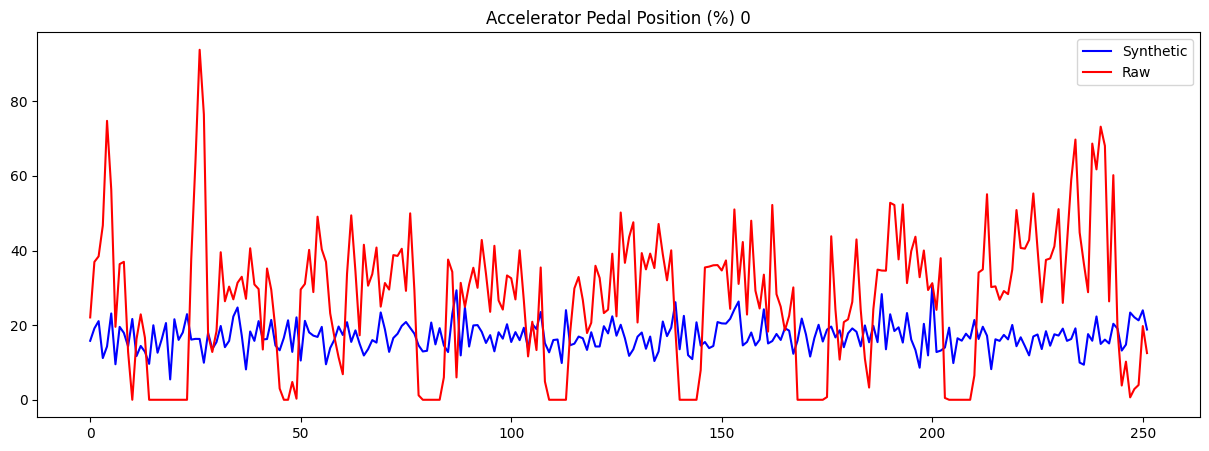

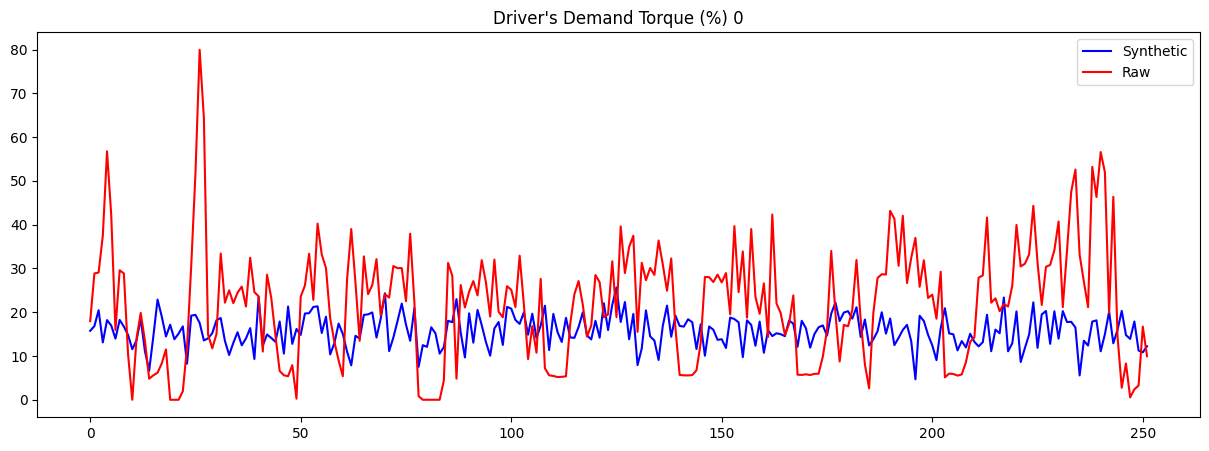

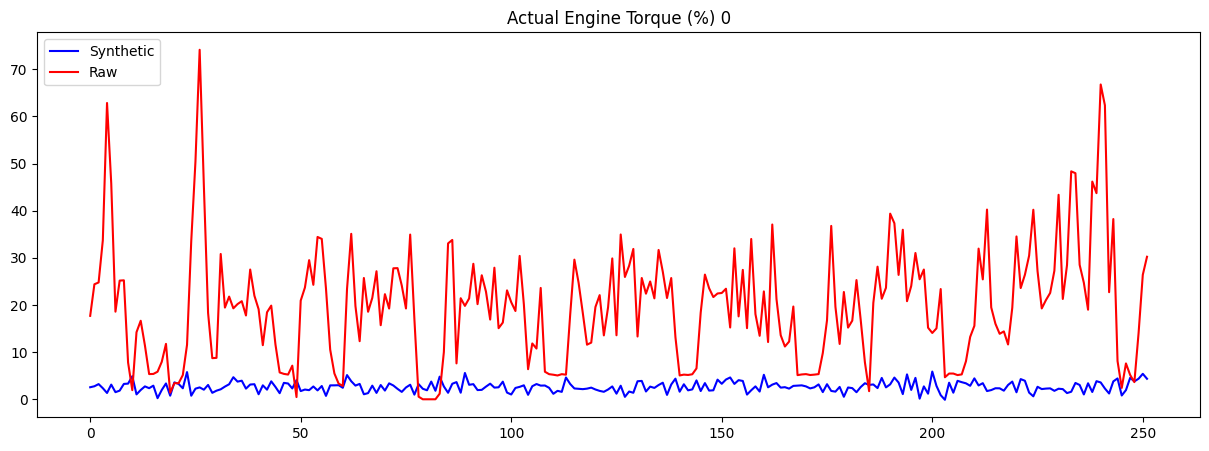

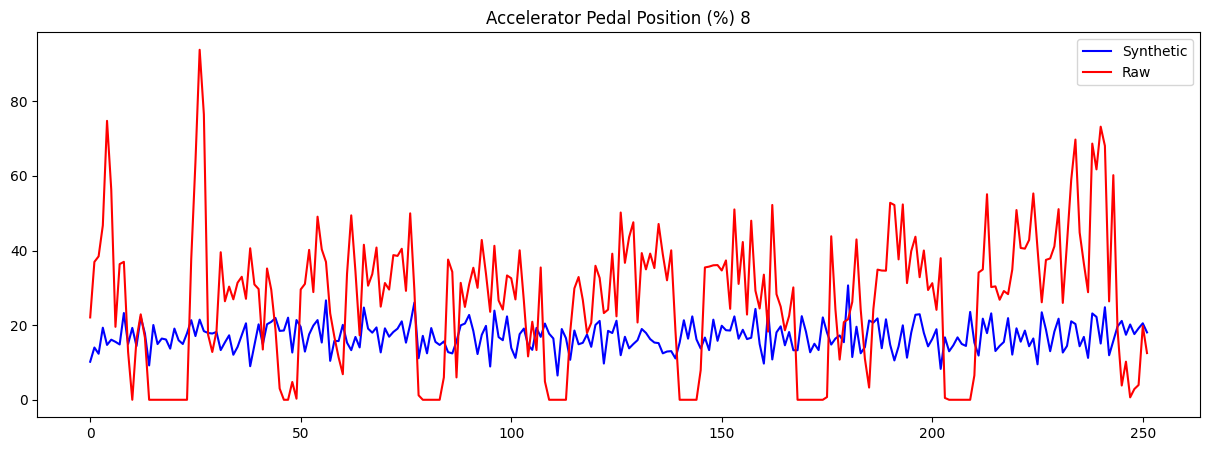

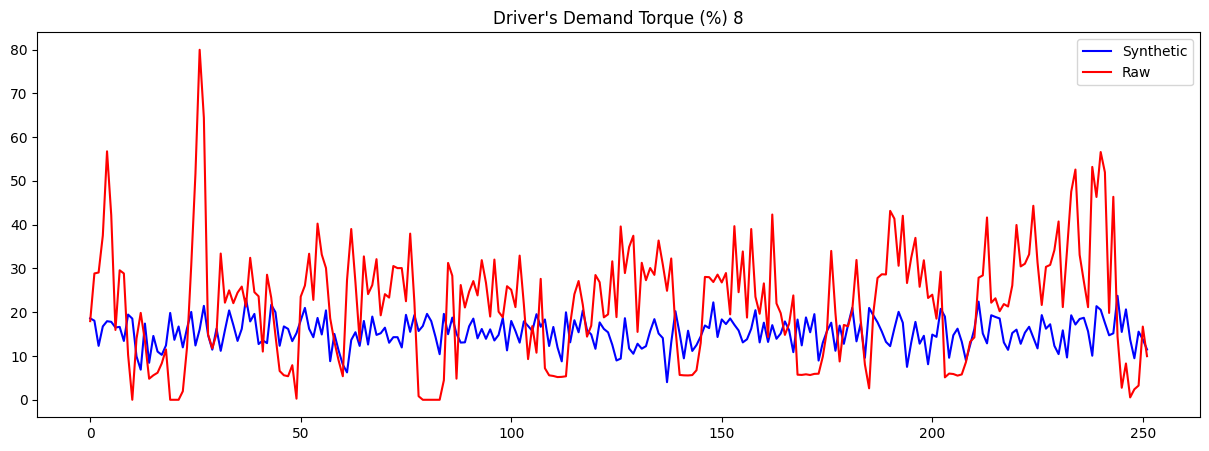

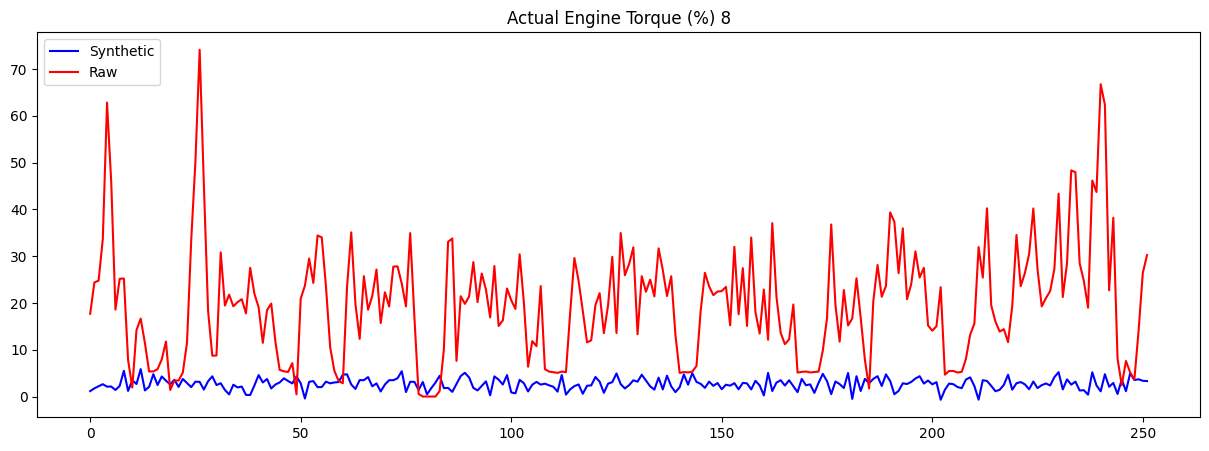

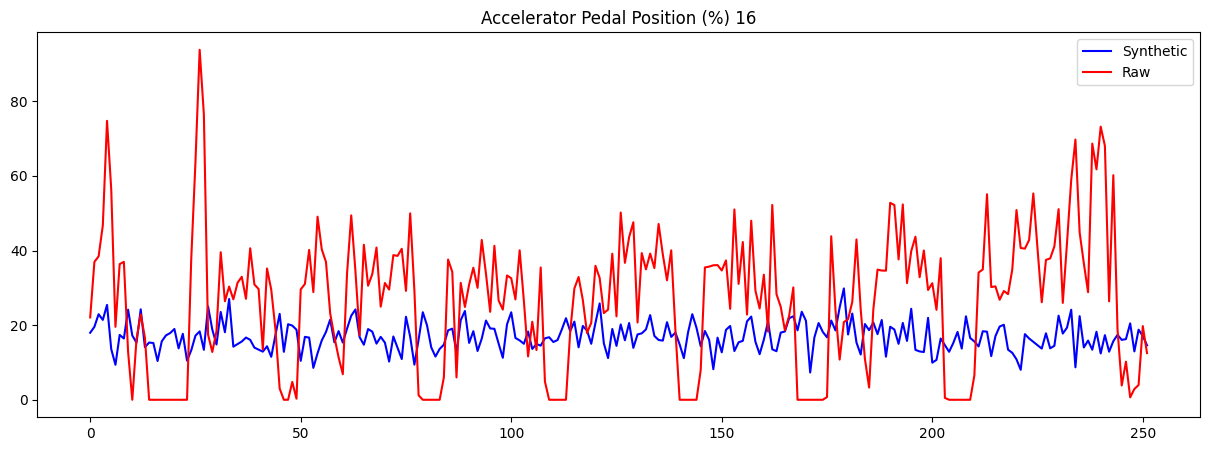

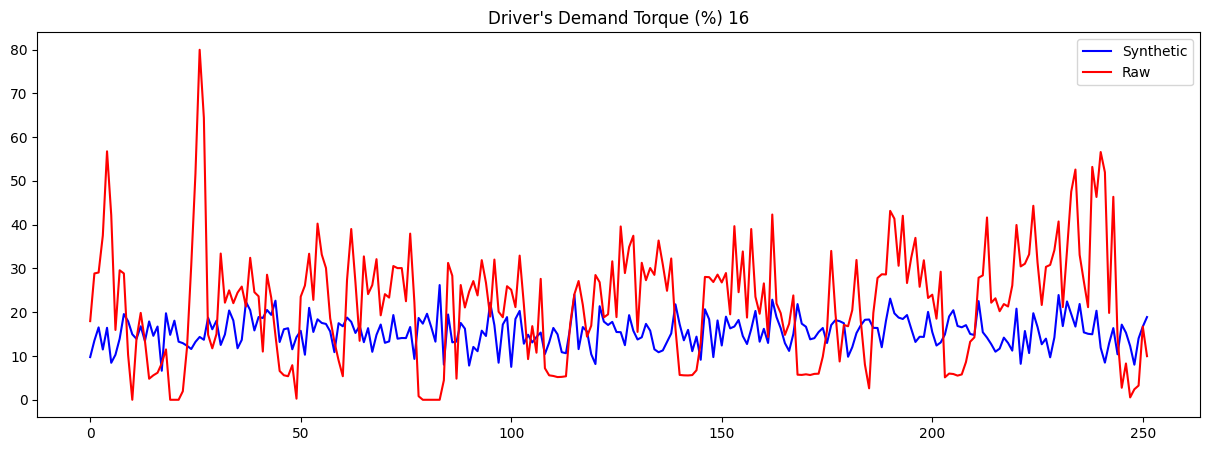

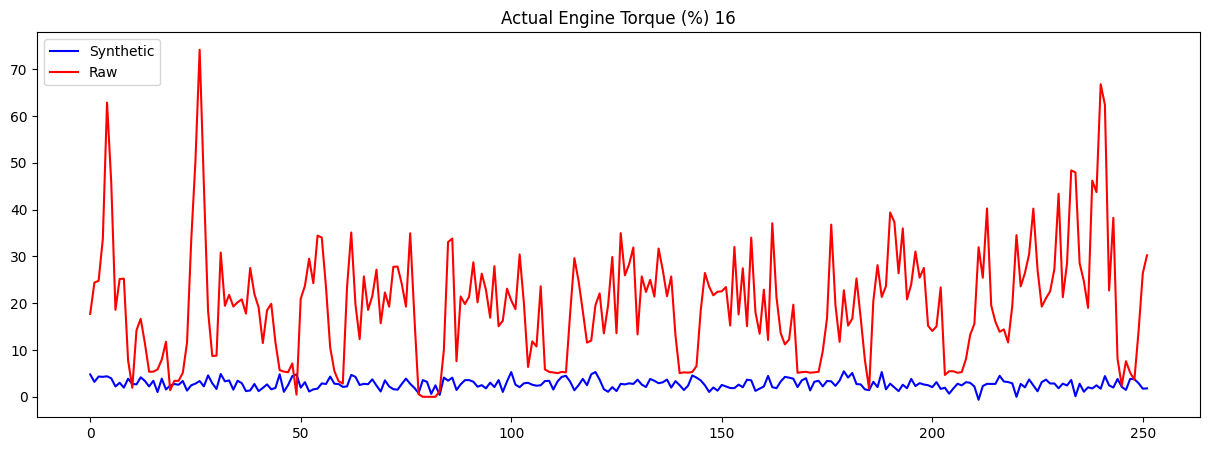

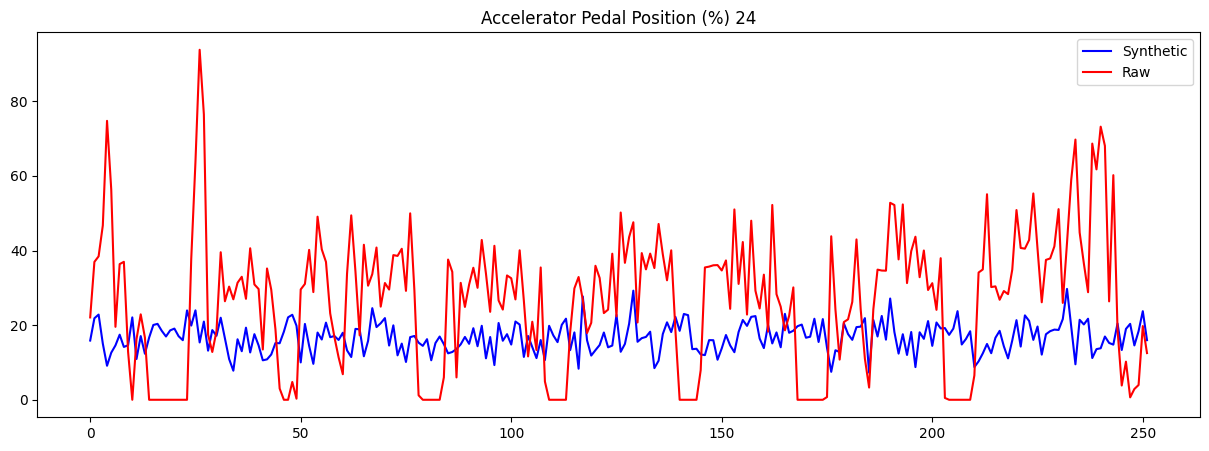

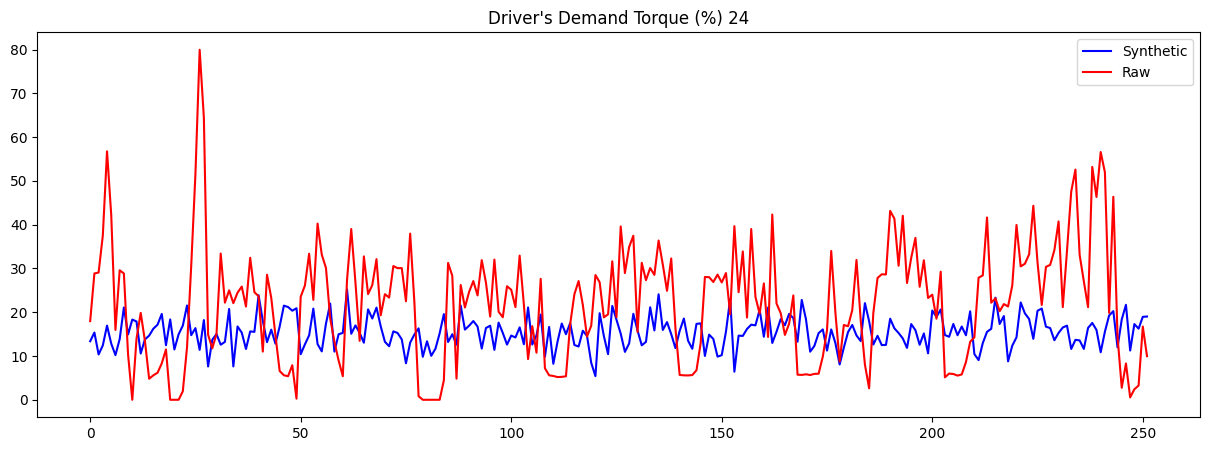

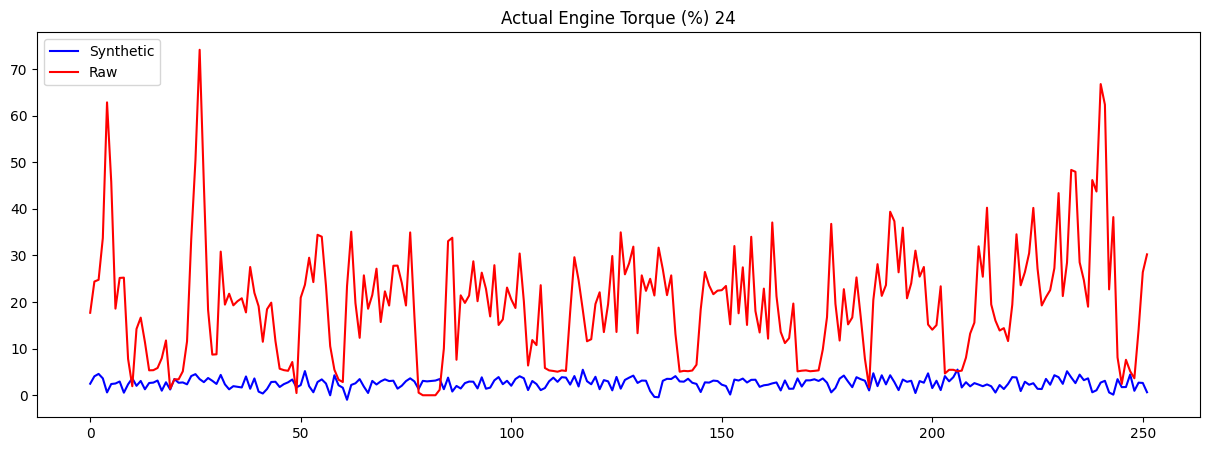

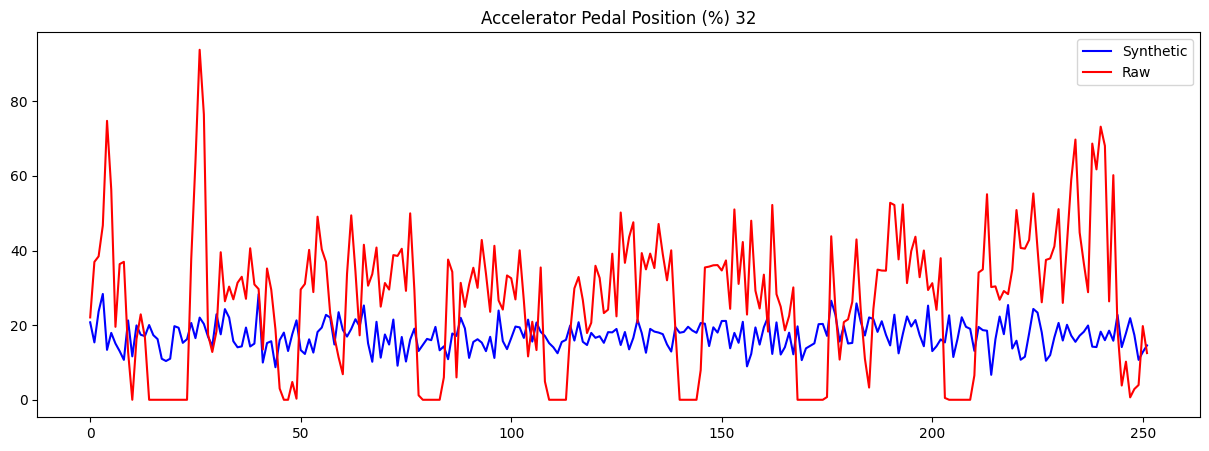

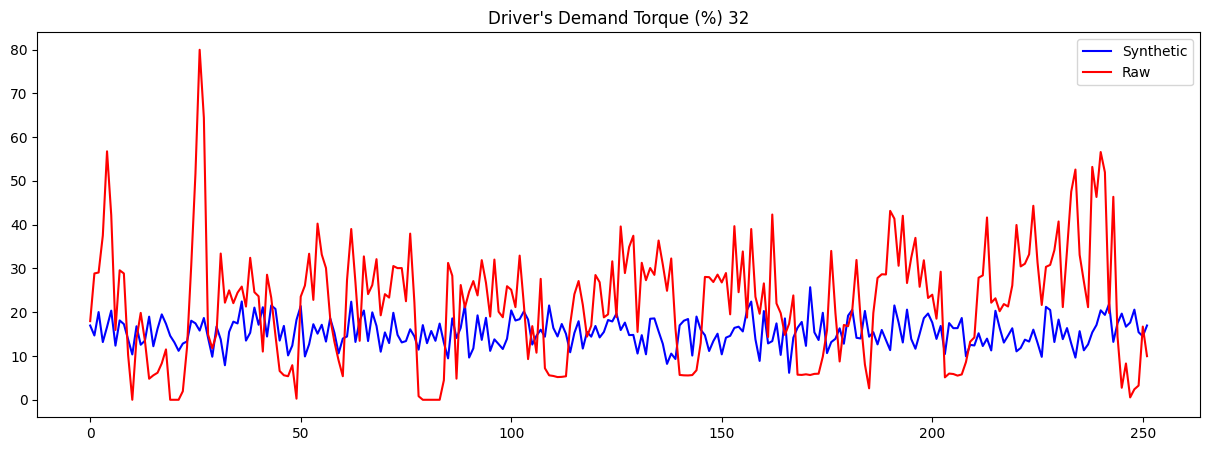

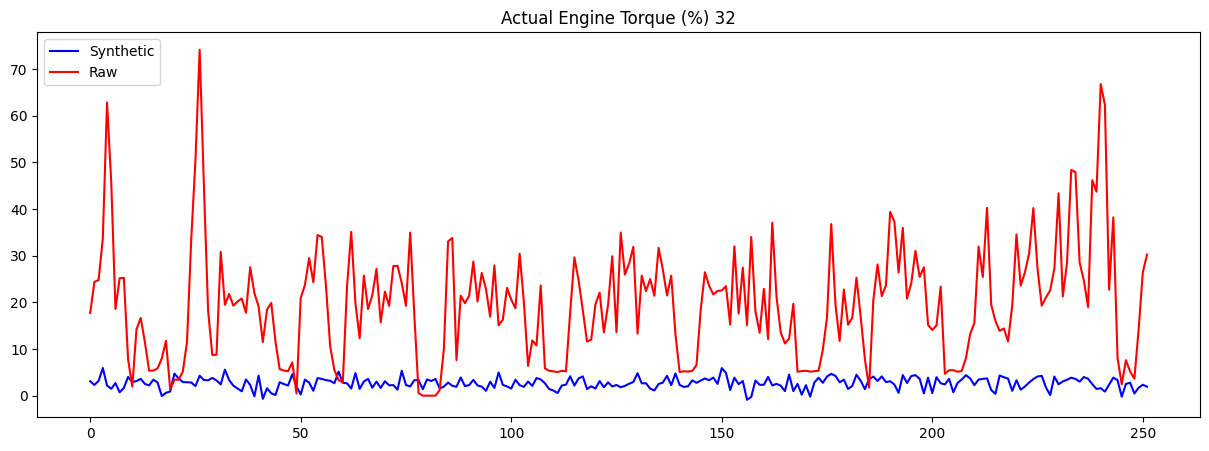

In [24]:
df = df1.copy()
path = 'Generated_engine_sys_data'
for i in range(40):
    name = path+"\\synthetic_engine_"+str(i)+".csv"
    

    # Generate synthetic data
    synthetic_df = model.generate_dataframe(int(len(df)/seq_len))

    synthetic_df
    w = 500
    if i % 8 == 0:
        plt.figure(figsize=(15,5))
        v1 = synthetic_df['61443-91'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df1)/w))]]/w
        v2 = df1['61443-91'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df1)/w))]]/w
        plt.title('Accelerator Pedal Position (%) ' + str(i))
        plt.plot(np.arange(len(v1)),v1, c='b', label='Synthetic')
        plt.plot(np.arange(len(v1)),v2, c='r', label = 'Raw')
        plt.legend()
        plt.figure(figsize=(15,5))
        v1 = synthetic_df['61444-512'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df1)/w))]]/w
        v2 = df1['61444-512'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df1)/w))]]/w
        plt.title('Driver\'s Demand Torque (%) '  + str(i))
        plt.plot(np.arange(len(v1)),v1, c='b', label='Synthetic')
        plt.plot(np.arange(len(v1)),v2, c='r', label = 'Raw')
        plt.legend()
        plt.figure(figsize=(15,5))
        v1 = synthetic_df['61444-513'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df1)/w))]]/w
        v2 = df1['61444-513'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df1)/w))]]/w
        plt.title('Actual Engine Torque (%) ' + str(i))
        plt.plot(np.arange(len(v1)),v1, c='b', label='Synthetic')
        plt.plot(np.arange(len(v1)),v2, c='r', label = 'Raw')
        plt.legend()

    synthetic_df.to_csv(name)
    del synthetic_df
plt.show()

In [25]:
sdf = pd.read_csv(r'C:\Users\virag\Documents\GitHub\Predictive-Maintenance\Generated_engine_sys_data\synthetic_engine_32.csv')
sdf.drop(['Unnamed: 0', 'example_id'], axis=1, inplace=True)

In [26]:
sdf.head()

,61444-513,61444-512,61443-91
0,0.158019,20.145147,20.681902
1,0.680604,23.597006,20.767181
2,0.212803,22.272919,20.899250
3,-0.079066,20.378788,20.724867
4,-0.106014,20.797026,21.075907


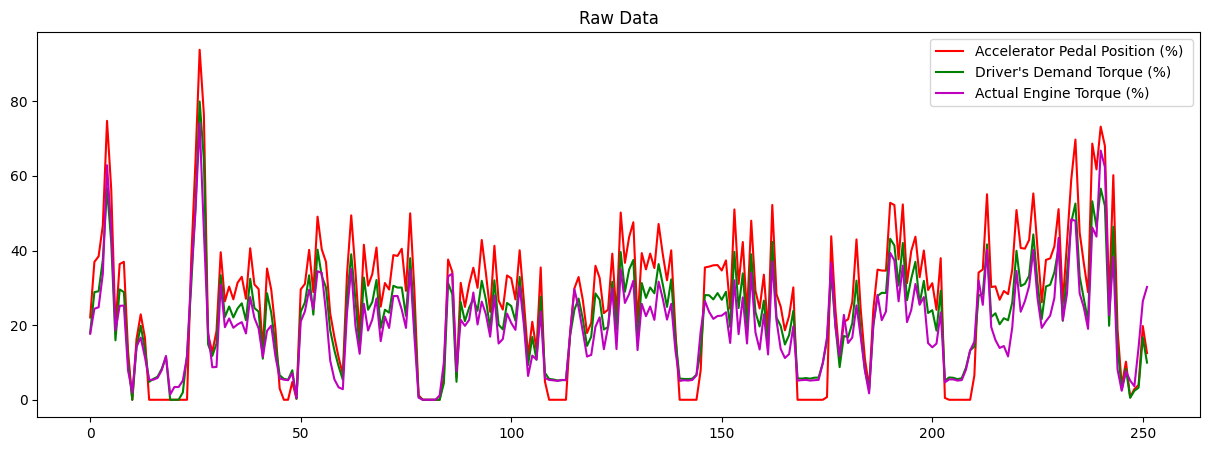

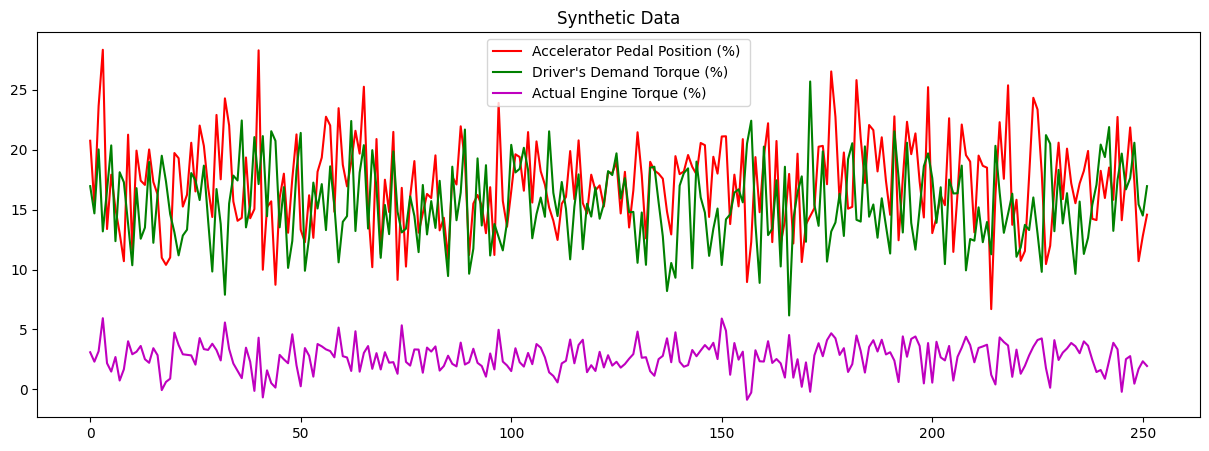

In [27]:
w=500
plt.figure(figsize=(15,5))
v2 = df1['61443-91'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df1)/w))]]/w
v3 = df1['61444-512'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df1)/w))]]/w
v4 = df1['61444-513'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df1)/w))]]/w
plt.title('Raw Data')
plt.plot(np.arange(len(v2)),v2, c='r', label='Accelerator Pedal Position (%) ')
plt.plot(np.arange(len(v2)),v3, c='g', label='Driver\'s Demand Torque (%) ')
plt.plot(np.arange(len(v2)),v4, c='m', label='Actual Engine Torque (%) ')
plt.legend()
plt.figure(figsize=(15,5))
v2 = sdf['61443-91'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(sdf)/w))]]/w
v3 = sdf['61444-512'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(sdf)/w))]]/w
v4 = sdf['61444-513'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(sdf)/w))]]/w
plt.title('Synthetic Data')
plt.plot(np.arange(len(v2)),v2, c='r', label='Accelerator Pedal Position (%) ')
plt.plot(np.arange(len(v2)),v3, c='g', label='Driver\'s Demand Torque (%) ')
plt.plot(np.arange(len(v2)),v4, c='m', label='Actual Engine Torque (%) ')
plt.legend()
plt.show()


In [28]:
df1.corr()

,61444-513,61444-512,61443-91
61444-513,1.000000,0.825254,0.813309
61444-512,0.825254,1.000000,0.942059
61443-91,0.813309,0.942059,1.000000


In [29]:
sdf.corr()

,61444-513,61444-512,61443-91
61444-513,1.000000,-0.481162,0.573451
61444-512,-0.481162,1.000000,0.259751
61443-91,0.573451,0.259751,1.000000


In [30]:
df1.describe()

,61444-513,61444-512,61443-91
count,126729.000000,126729.000000,126729.000000
mean,19.722423,22.104396,26.583216
std,22.373022,25.956896,31.386742
min,0.000000,0.000000,0.000000
25%,4.000000,0.000000,0.000000
50%,6.000000,7.000000,0.000000
75%,36.000000,43.000000,54.800000
max,95.000000,99.000000,100.000000


In [31]:
sdf.describe()

,61444-513,61444-512,61443-91
count,126720.000000,126720.000000,126720.000000
mean,2.657036,15.405324,17.154394
std,4.772089,15.288976,17.557041
min,-7.228885,-6.000801,-12.444278
25%,-1.351481,-1.634597,2.446410
50%,3.617269,21.425697,12.020668
75%,6.241558,26.674168,31.252655
max,20.516699,54.378150,68.546350


In [32]:
def moving_avg(x, N=1000):          #function to compute moving average
    return np.convolve(x, np.ones((N,))/N, mode='valid')

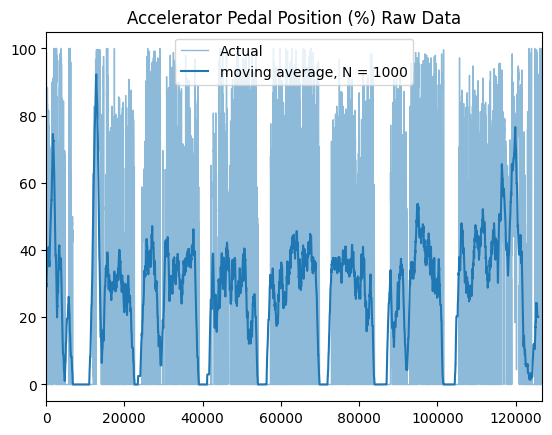

In [33]:

plt.plot(df1['61443-91'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(df1['61443-91'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(df1['61443-91']))
plt.title('Accelerator Pedal Position (%) Raw Data')
plt.legend()
plt.show()


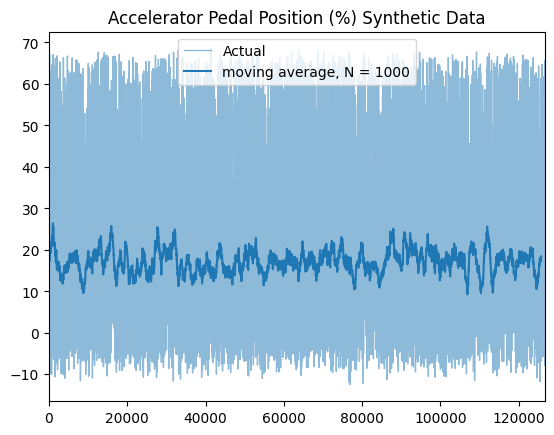

In [34]:
plt.plot(sdf['61443-91'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(sdf['61443-91'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(sdf['61443-91']))
plt.title('Accelerator Pedal Position (%) Synthetic Data')
plt.legend()
plt.show()

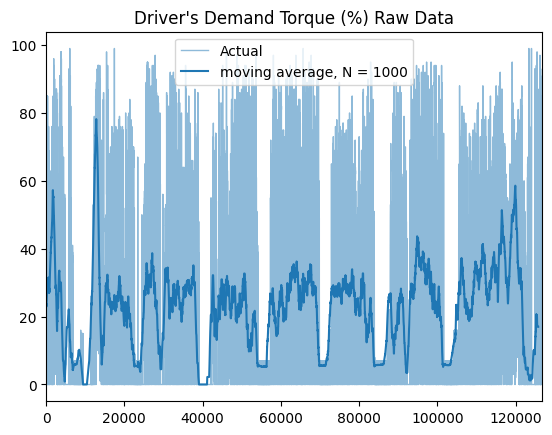

In [35]:
plt.plot(df1['61444-512'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(df1['61444-512'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(df1['61444-512']))
plt.title('Driver\'s Demand Torque (%) Raw Data')
plt.legend()
plt.show()

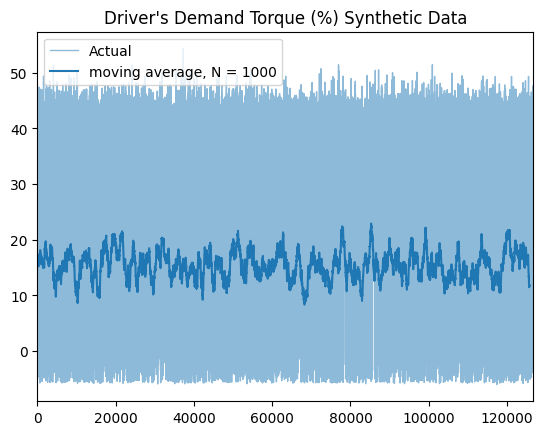

In [36]:
plt.plot(sdf['61444-512'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(sdf['61444-512'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(sdf['61444-512']))
plt.title('Driver\'s Demand Torque (%) Synthetic Data')
plt.legend()
plt.show()

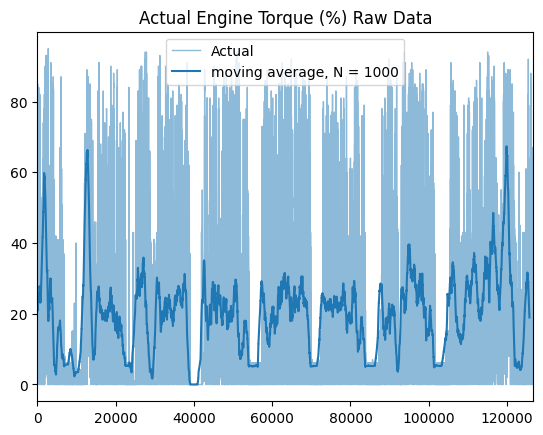

In [37]:
plt.plot(df1['61444-513'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(df1['61444-513'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(df1['61444-513']))
plt.title('Actual Engine Torque (%) Raw Data')
plt.legend()
plt.show()

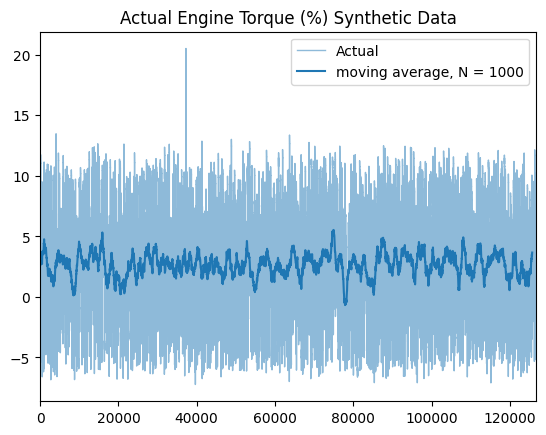

In [38]:
plt.plot(sdf['61444-513'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(sdf['61444-513'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(sdf['61444-513']))
plt.title('Actual Engine Torque (%) Synthetic Data')
plt.legend()
plt.show()